### Importação dos dados



In [7]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [9]:
import pandas as pd

# URLs das bases de dados
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

# Leitura dos dados
loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

# Adicionando coluna com o nome da loja
loja1['loja'] = 'loja_1'
loja2['loja'] = 'loja_2'
loja3['loja'] = 'loja_3'
loja4['loja'] = 'loja_4'

# Concatenando os dados
todas_lojas = pd.concat([loja1, loja2, loja3, loja4], ignore_index=True)

# Convertendo a data da compra para formato datetime
todas_lojas['Data da Compra'] = pd.to_datetime(todas_lojas['Data da Compra'], dayfirst=True)

# Calculando o faturamento (Preço + Frete)
todas_lojas['Faturamento'] = todas_lojas['Preço'] + todas_lojas['Frete']

# Faturamento por loja
faturamento_por_loja = todas_lojas.groupby('loja')['Faturamento'].sum().reset_index()

# Faturamento total geral
faturamento_total = todas_lojas['Faturamento'].sum()

# Exibindo os resultados
print("Faturamento por loja:")
print(faturamento_por_loja)

print("\nFaturamento total geral:")
print(f"R$ {faturamento_total:,.2f}")


Faturamento por loja:
     loja   Faturamento
0  loja_1  1.616347e+06
1  loja_2  1.567773e+06
2  loja_3  1.542048e+06
3  loja_4  1.458253e+06

Faturamento total geral:
R$ 6,184,421.45


#1. Análise do faturamento


In [12]:
# 1. Faturamento por Loja
faturamento_por_loja = todas_lojas.groupby('loja')['Faturamento'].sum().reset_index()
faturamento_por_loja['Faturamento'] = faturamento_por_loja['Faturamento'].map(lambda x: f"R$ {x:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))
print("\n1. Faturamento por Loja:")
print(faturamento_por_loja)



1. Faturamento por Loja:
     loja      Faturamento
0  loja_1  R$ 1.616.347,09
1  loja_2  R$ 1.567.773,22
2  loja_3  R$ 1.542.047,69
3  loja_4  R$ 1.458.253,46


<ipython-input-19-a3a093e5b5f6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=faturamento, x='loja', y='Faturamento', palette='Blues_d')


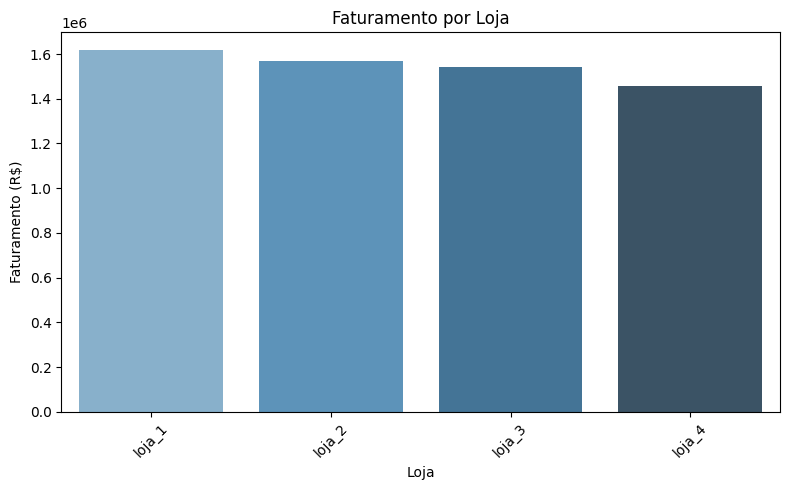

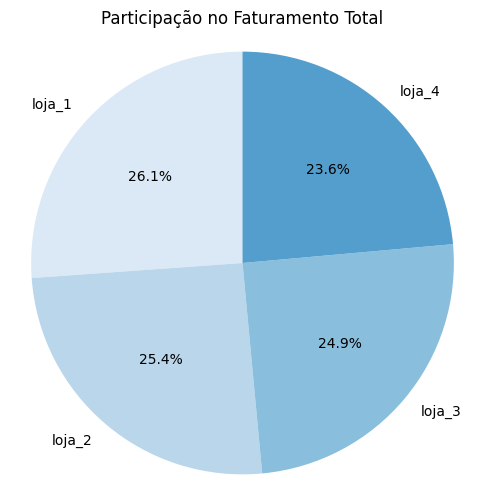

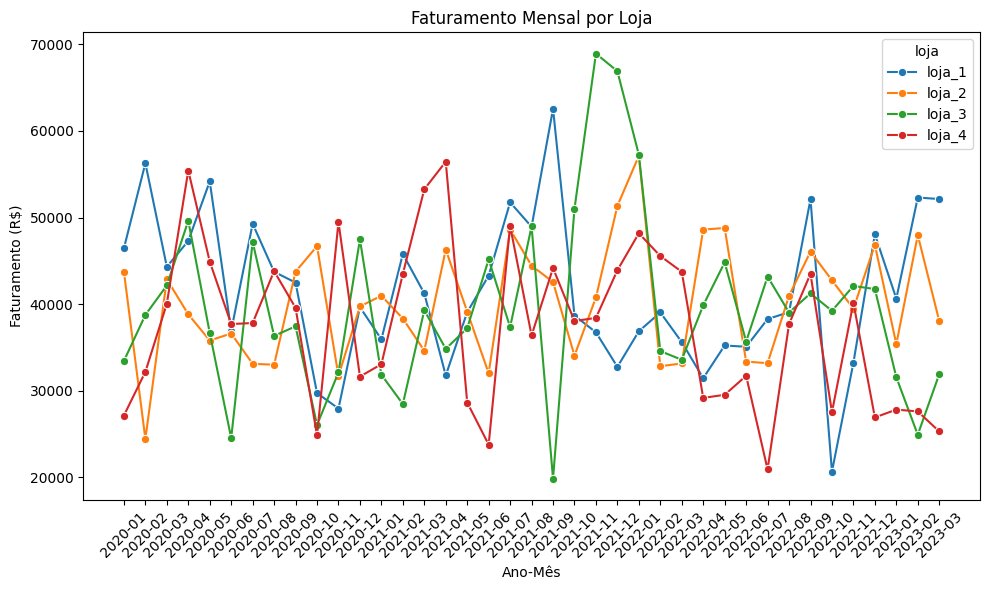

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Converter para valores numéricos (caso esteja formatado como string)
todas_lojas['Faturamento'] = todas_lojas['Preço'] + todas_lojas['Frete']
faturamento = todas_lojas.groupby('loja')['Faturamento'].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=faturamento, x='loja', y='Faturamento', palette='Blues_d')
plt.title('Faturamento por Loja')
plt.ylabel('Faturamento (R$)')
plt.xlabel('Loja')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
plt.pie(faturamento['Faturamento'], labels=faturamento['loja'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Blues'))
plt.title('Participação no Faturamento Total')
plt.axis('equal')
plt.show()

# Converter datas
todas_lojas['Data da Compra'] = pd.to_datetime(todas_lojas['Data da Compra'], dayfirst=True)

# Criar coluna de mês/ano
todas_lojas['AnoMes'] = todas_lojas['Data da Compra'].dt.to_period('M')

faturamento_mensal = todas_lojas.groupby(['AnoMes', 'loja'])['Faturamento'].sum().reset_index()
faturamento_mensal['AnoMes'] = faturamento_mensal['AnoMes'].astype(str)

plt.figure(figsize=(10, 6))
sns.lineplot(data=faturamento_mensal, x='AnoMes', y='Faturamento', hue='loja', marker='o')
plt.title('Faturamento Mensal por Loja')
plt.ylabel('Faturamento (R$)')
plt.xlabel('Ano-Mês')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 2. Vendas por Categoria


In [13]:
vendas_por_categoria = todas_lojas['Categoria do Produto'].value_counts().reset_index()
vendas_por_categoria.columns = ['Categoria do Produto', 'Total de Vendas']
print("\n2. Vendas por Categoria:")
print(vendas_por_categoria)


2. Vendas por Categoria:
    Categoria do Produto  Total de Vendas
0                 moveis             1886
1            eletronicos             1772
2             brinquedos             1290
3       eletrodomesticos             1149
4        esporte e lazer             1113
5  instrumentos musicais              753
6                 livros              742
7  utilidades domesticas              730


<ipython-input-20-1113c0e65087>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vendas_categoria, x='Vendas', y='Categoria', palette='viridis')


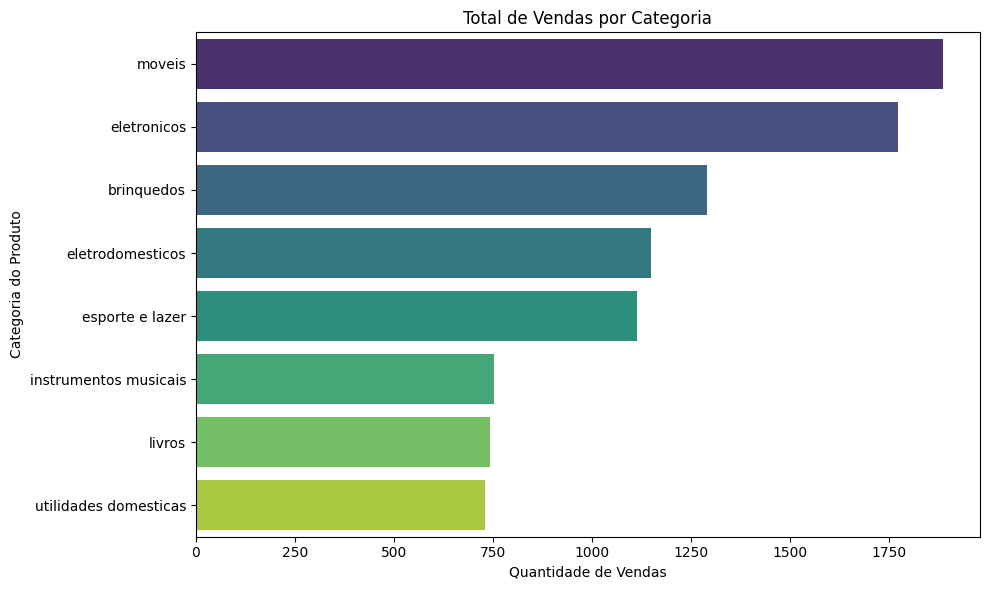

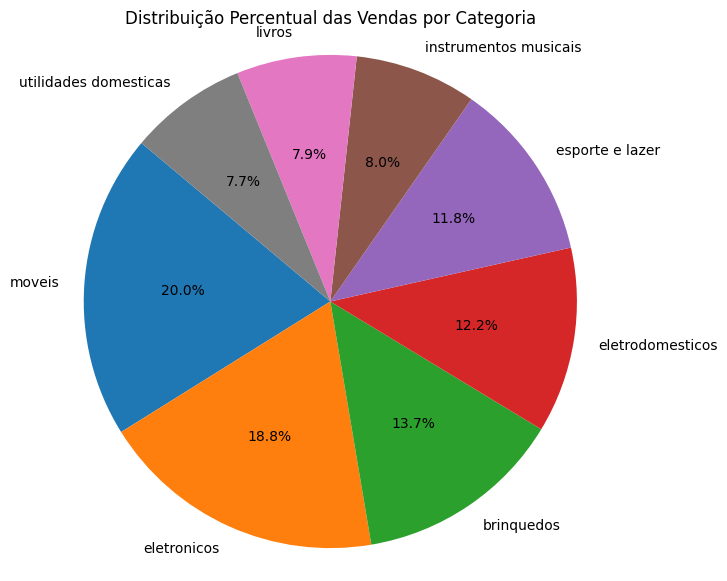

<ipython-input-20-1113c0e65087>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=todas_lojas, x='Categoria do Produto', y='Preço', jitter=True, alpha=0.5, palette='muted')


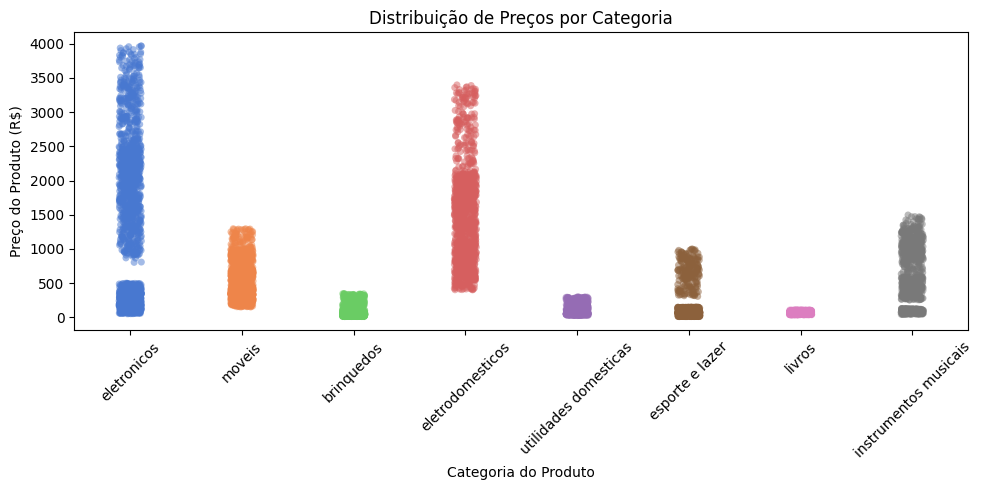

In [20]:
vendas_categoria = todas_lojas['Categoria do Produto'].value_counts().reset_index()
vendas_categoria.columns = ['Categoria', 'Vendas']

plt.figure(figsize=(10, 6))
sns.barplot(data=vendas_categoria, x='Vendas', y='Categoria', palette='viridis')
plt.title('Total de Vendas por Categoria')
plt.xlabel('Quantidade de Vendas')
plt.ylabel('Categoria do Produto')
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 7))
plt.pie(vendas_categoria['Vendas'], labels=vendas_categoria['Categoria'], autopct='%1.1f%%', startangle=140)
plt.title('Distribuição Percentual das Vendas por Categoria')
plt.axis('equal')
plt.show()

# Cada ponto representa uma venda de um produto dentro de sua categoria
plt.figure(figsize=(10, 5))
sns.stripplot(data=todas_lojas, x='Categoria do Produto', y='Preço', jitter=True, alpha=0.5, palette='muted')
plt.title('Distribuição de Preços por Categoria')
plt.ylabel('Preço do Produto (R$)')
plt.xlabel('Categoria do Produto')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 3. Média de Avaliação das Lojas

In [14]:
media_avaliacao_lojas = todas_lojas.groupby('loja')['Avaliação da compra'].mean().reset_index()
media_avaliacao_lojas.columns = ['Loja', 'Média de Avaliação']
media_avaliacao_lojas['Média de Avaliação'] = media_avaliacao_lojas['Média de Avaliação'].round(2)
print("\n3. Média de Avaliação das Lojas:")
print(media_avaliacao_lojas)


3. Média de Avaliação das Lojas:
     Loja  Média de Avaliação
0  loja_1                3.98
1  loja_2                4.04
2  loja_3                4.05
3  loja_4                4.00


<ipython-input-21-c92b24d7b733>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=media_avaliacao_lojas, x='loja', y='Avaliação da compra', palette='coolwarm')


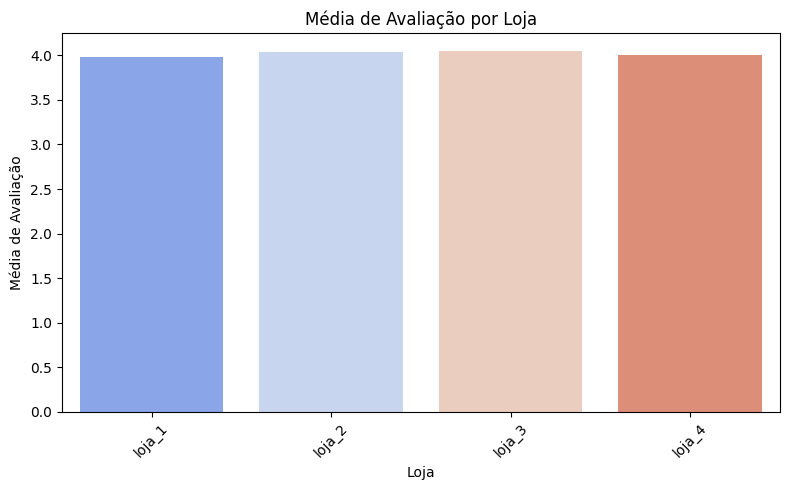

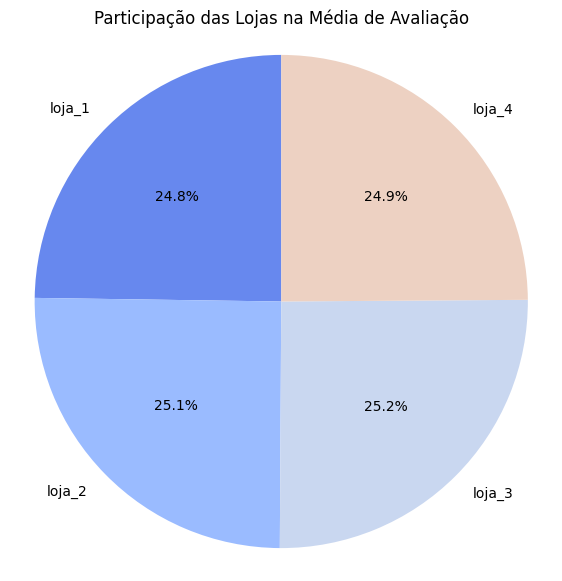

<ipython-input-21-c92b24d7b733>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=todas_lojas, x='loja', y='Avaliação da compra', palette='coolwarm')


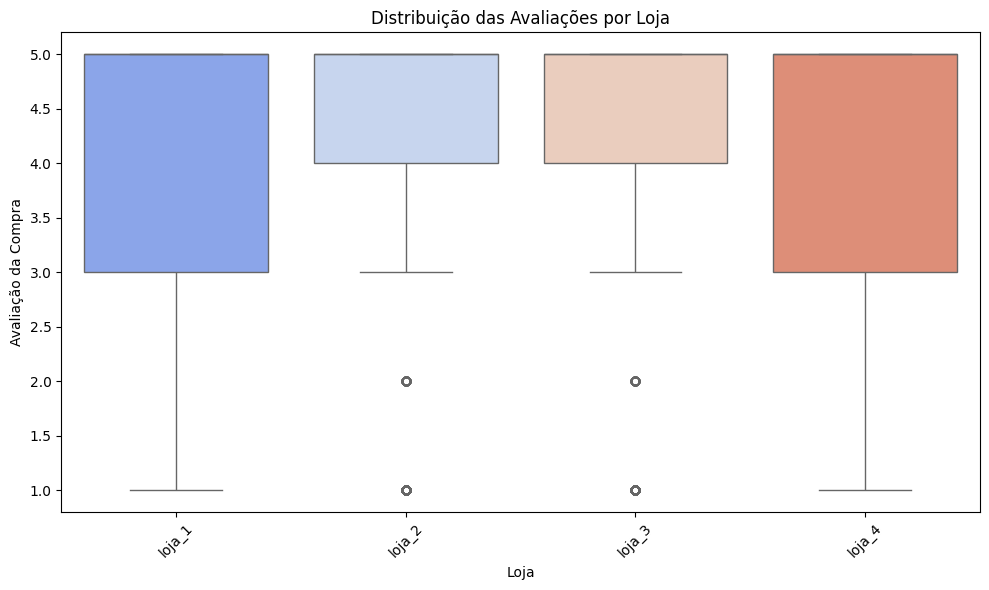

In [21]:
# Média de Avaliação por Loja
media_avaliacao_lojas = todas_lojas.groupby('loja')['Avaliação da compra'].mean().reset_index()
media_avaliacao_lojas['Avaliação da compra'] = media_avaliacao_lojas['Avaliação da compra'].round(2)

plt.figure(figsize=(8, 5))
sns.barplot(data=media_avaliacao_lojas, x='loja', y='Avaliação da compra', palette='coolwarm')
plt.title('Média de Avaliação por Loja')
plt.ylabel('Média de Avaliação')
plt.xlabel('Loja')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 7))
plt.pie(media_avaliacao_lojas['Avaliação da compra'], labels=media_avaliacao_lojas['loja'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('coolwarm'))
plt.title('Participação das Lojas na Média de Avaliação')
plt.axis('equal')
plt.show()

# Gráfico de distribuição das avaliações das lojas
plt.figure(figsize=(10, 6))
sns.boxplot(data=todas_lojas, x='loja', y='Avaliação da compra', palette='coolwarm')
plt.title('Distribuição das Avaliações por Loja')
plt.ylabel('Avaliação da Compra')
plt.xlabel('Loja')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 4. Produtos Mais e Menos Vendidos

In [15]:
vendas_produtos = todas_lojas['Produto'].value_counts().reset_index()
vendas_produtos.columns = ['Produto', 'Quantidade Vendida']

produto_mais_vendido = vendas_produtos.iloc[0]
produto_menos_vendido = vendas_produtos.iloc[-1]

print("\n4. Produto Mais Vendido:")
print(produto_mais_vendido)

print("\nProduto Menos Vendido:")
print(produto_menos_vendido)


4. Produto Mais Vendido:
Produto               Cômoda
Quantidade Vendida       210
Name: 0, dtype: object

Produto Menos Vendido:
Produto               Celular ABXY
Quantidade Vendida             157
Name: 50, dtype: object


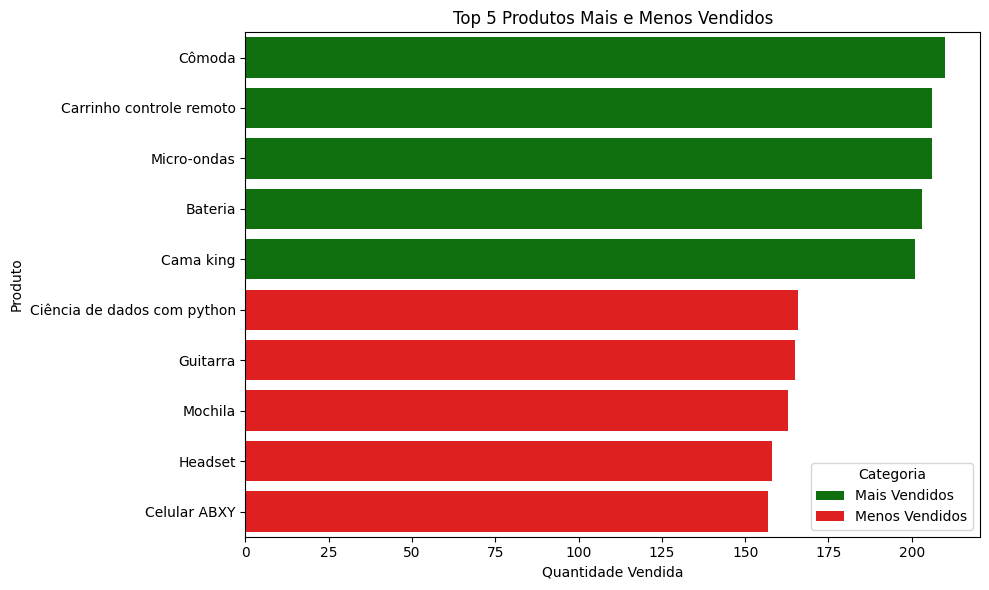

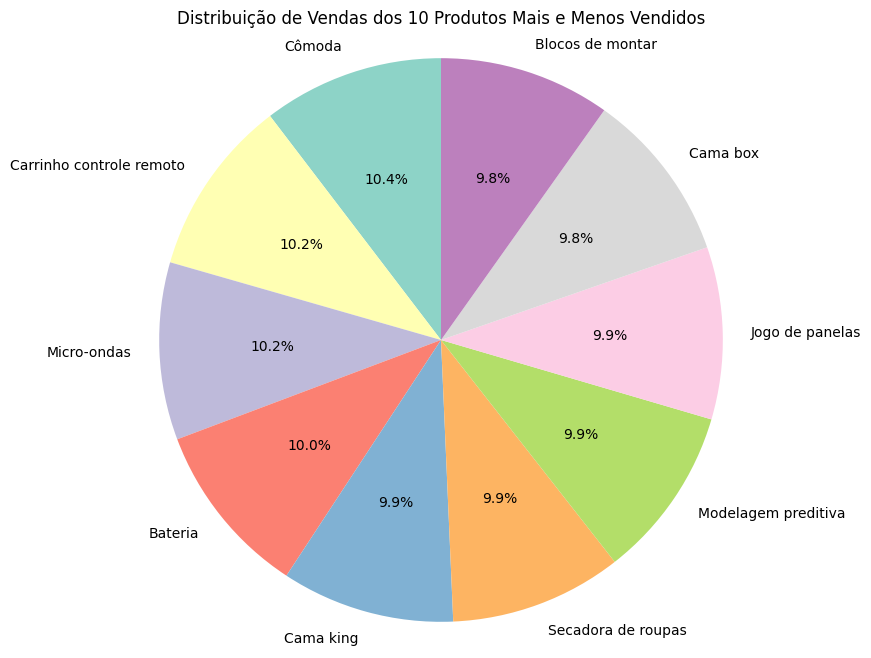

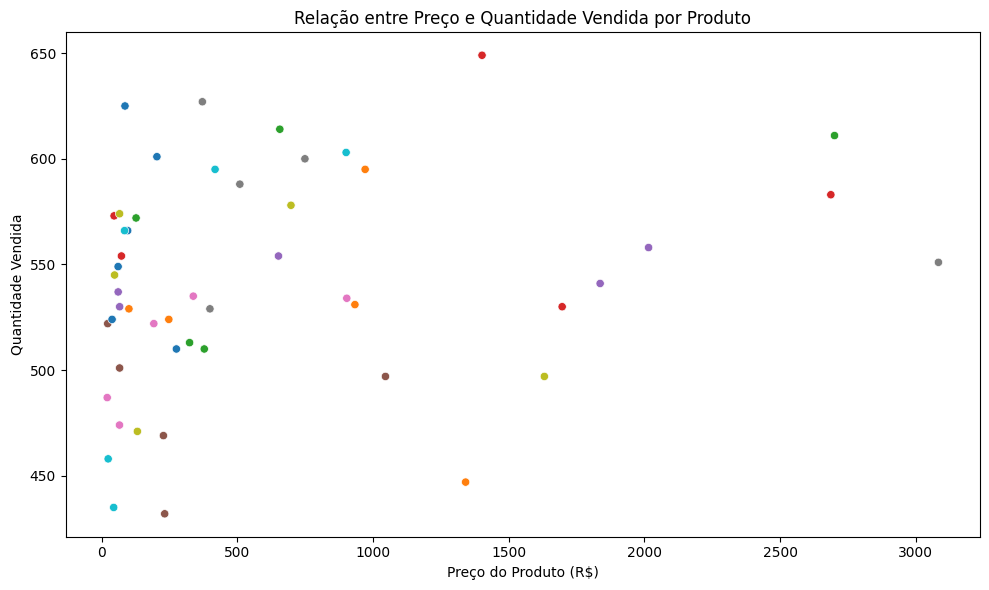

In [22]:
# Contagem de vendas por produto
vendas_produtos = todas_lojas['Produto'].value_counts().reset_index()
vendas_produtos.columns = ['Produto', 'Quantidade Vendida']

# Selecionando os 5 produtos mais e menos vendidos
top_5_produtos = vendas_produtos.head(5)
bottom_5_produtos = vendas_produtos.tail(5)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_produtos, x='Quantidade Vendida', y='Produto', color='green', label='Mais Vendidos')
sns.barplot(data=bottom_5_produtos, x='Quantidade Vendida', y='Produto', color='red', label='Menos Vendidos')
plt.title('Top 5 Produtos Mais e Menos Vendidos')
plt.xlabel('Quantidade Vendida')
plt.ylabel('Produto')
plt.legend(title='Categoria')
plt.tight_layout()
plt.show()

# Adicionando as categorias para a análise
produtos_combinados = vendas_produtos.head(10)  # Considerando os 5 mais e os 5 menos vendidos

plt.figure(figsize=(8, 8))
plt.pie(produtos_combinados['Quantidade Vendida'], labels=produtos_combinados['Produto'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))
plt.title('Distribuição de Vendas dos 10 Produtos Mais e Menos Vendidos')
plt.axis('equal')
plt.show()

# Para ver a relação entre o preço e a quantidade vendida dos produtos
produtos_preco_vendas = todas_lojas.groupby('Produto').agg({'Preço': 'mean', 'Quantidade de parcelas': 'sum'}).reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=produtos_preco_vendas, x='Preço', y='Quantidade de parcelas', hue='Produto', palette='tab10', legend=False)
plt.title('Relação entre Preço e Quantidade Vendida por Produto')
plt.xlabel('Preço do Produto (R$)')
plt.ylabel('Quantidade Vendida')
plt.tight_layout()
plt.show()


# 5. Frete Médio por Loja


In [16]:
frete_medio_loja = todas_lojas.groupby('loja')['Frete'].mean().reset_index()
frete_medio_loja.columns = ['Loja', 'Frete Médio']
frete_medio_loja['Frete Médio'] = frete_medio_loja['Frete Médio'].map(lambda x: f"R$ {x:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))
print("\n5. Frete Médio por Loja:")
print(frete_medio_loja)


5. Frete Médio por Loja:
     Loja Frete Médio
0  loja_1    R$ 34,69
1  loja_2    R$ 33,62
2  loja_3    R$ 33,07
3  loja_4    R$ 31,28


<ipython-input-23-c273b52bd6c6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=frete_medio_lojas, x='loja', y='Frete', palette='Blues')


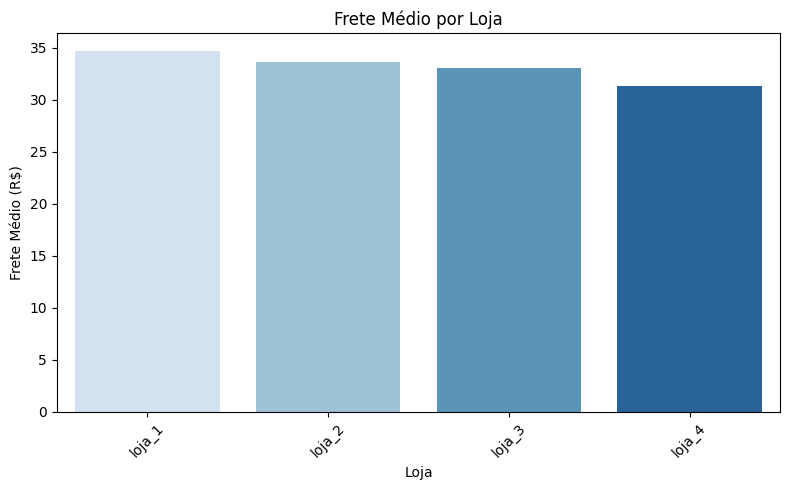

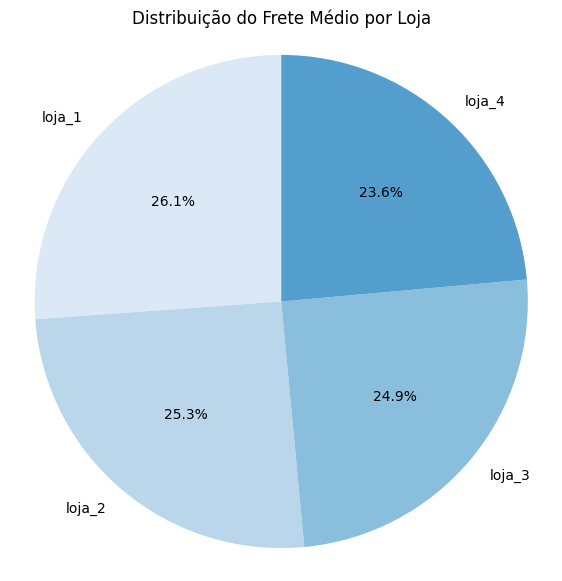

<ipython-input-23-c273b52bd6c6>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=todas_lojas, x='loja', y='Frete', palette='Blues')


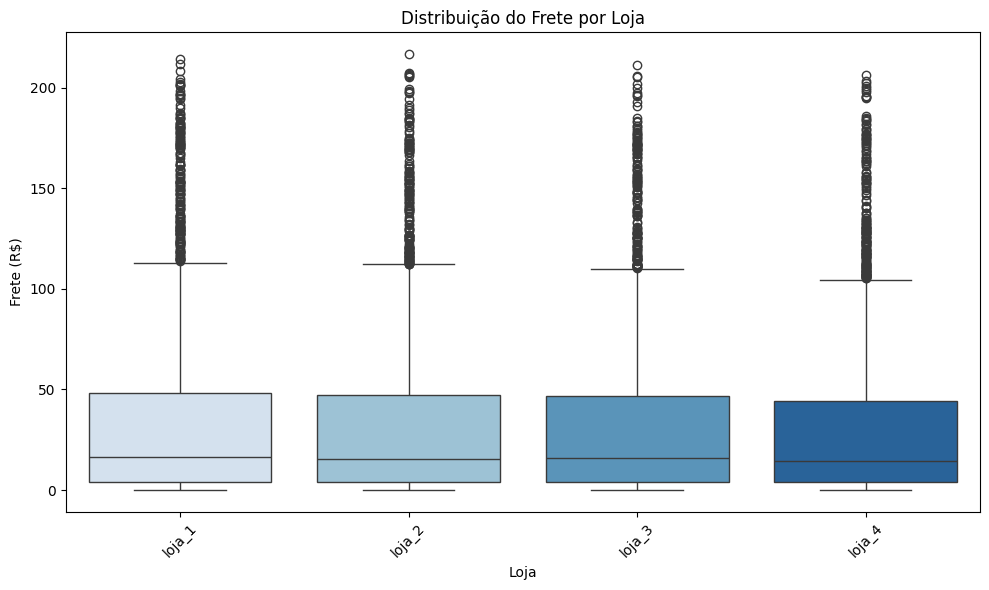

In [23]:
# Frete Médio por Loja
frete_medio_lojas = todas_lojas.groupby('loja')['Frete'].mean().reset_index()
frete_medio_lojas['Frete'] = frete_medio_lojas['Frete'].round(2)

plt.figure(figsize=(8, 5))
sns.barplot(data=frete_medio_lojas, x='loja', y='Frete', palette='Blues')
plt.title('Frete Médio por Loja')
plt.ylabel('Frete Médio (R$)')
plt.xlabel('Loja')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 7))
plt.pie(frete_medio_lojas['Frete'], labels=frete_medio_lojas['loja'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Blues'))
plt.title('Distribuição do Frete Médio por Loja')
plt.axis('equal')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=todas_lojas, x='loja', y='Frete', palette='Blues')
plt.title('Distribuição do Frete por Loja')
plt.ylabel('Frete (R$)')
plt.xlabel('Loja')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Relatório de Desempenho das Lojas – Indicação de Venda
Prezado Sr. João,

Com base na análise detalhada dos dados das quatro lojas sob sua administração, apresentamos abaixo os resultados que apontam qual loja apresenta o pior desempenho financeiro e operacional. O objetivo deste relatório é indicar com embasamento qual unidade é menos vantajosa para manter e, portanto, pode ser considerada para venda ou encerramento.

1. Faturamento Total por Loja
O faturamento é o principal indicador financeiro para avaliar o desempenho geral de uma loja. Veja abaixo os valores:

Loja 1: R$ 1.616.347,09

Loja 2: R$ 1.567.773,22

Loja 3: R$ 1.542.047,69

Loja 4: R$ 1.458.253,46 ✅ [menor faturamento]

➡ A Loja 4 teve o pior desempenho em faturamento, sendo cerca de R$ 158 mil inferior à Loja 1, líder em receita.

2. Média de Avaliação dos Clientes
A média de avaliação dos consumidores impacta diretamente na imagem da loja e na fidelização de clientes:

Loja 3: 4.05

Loja 2: 4.04

Loja 4: 4.00

Loja 1: 3.98

➡ Apesar do menor faturamento, a Loja 4 não possui a pior avaliação — o que sugere que a experiência do cliente é razoável. No entanto, essa vantagem não se traduz em vendas.

3. Frete Médio por Loja
O custo médio do frete pode ser um atrativo ao cliente, especialmente em regiões mais distantes:

Loja 4: R$ 31,28 ✅ [menor frete médio]

Loja 3: R$ 33,07

Loja 2: R$ 33,62

Loja 1: R$ 34,69

➡ A Loja 4 possui o menor frete médio, o que pode indicar boa logística. Porém, esse fator não resultou em maior volume de vendas.

4. Vendas por Categoria e Produtos
Os produtos mais vendidos são móveis e eletrônicos. A análise revelou que mesmo atuando em categorias com alta demanda, a Loja 4 não se destaca em volume de vendas por categoria nem entre os produtos mais vendidos.

📌 Conclusão e Recomendação Final
Analisando os principais indicadores, observamos que:

A Loja 4 tem o menor faturamento absoluto, o que representa um desempenho abaixo da média.

Mesmo com frete competitivo e avaliações razoáveis, não converte esse cenário em receita ou volume de vendas.

As demais lojas apresentam melhor equilíbrio entre faturamento, avaliação e vendas por categoria.

✅ Recomendação:
Recomendamos que o Sr. João priorize a venda ou descontinuação da Loja 4, pois ela apresenta o pior desempenho financeiro, com menor retorno sobre operação mesmo apresentando boas condições logísticas. Concentrar esforços nas lojas com maior faturamento e potencial de crescimento é a melhor estratégia para otimizar os resultados do negócio.

Estamos à disposição para apoiá-lo nos próximos passos.

Atenciosamente,
João Paulo C Silva - Data Analytcs